# GPU Execution

W1130 01:12:59.838853 1088929 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W1130 01:12:59.840790 1080946 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.



Started optimization using 1 process
Step 000000 [process00]: min infidelity = 3.026289e-02, converged = 0 / 50
Step 000020 [process00]: min infidelity = 3.576994e-03, converged = 0 / 50
Step 000040 [process00]: min infidelity = 2.113879e-03, converged = 0 / 50
Step 000060 [process00]: min infidelity = 6.190538e-04, converged = 0 / 50
Step 000080 [process00]: min infidelity = 2.021790e-04, converged = 0 / 50
Step 000100 [process00]: min infidelity = 8.749962e-05, converged = 0 / 50
Step 000120 [process00]: min infidelity = 7.438660e-05, converged = 0 / 50
Step 000140 [process00]: min infidelity = 6.866455e-05, converged = 0 / 50
Step 000160 [process00]: min infidelity = 6.413460e-05, converged = 0 / 50
Step 000180 [process00]: min infidelity = 5.960464e-05, converged = 0 / 50
Step 000200 [process00]: min infidelity = 1.692772e-05, converged = 0 / 50
Step 000220 [process00]: min infidelity = 7.033348e-06, converged = 1 / 50
Step 000240 [process00]: min infidelity = 5.245209e-06, conver

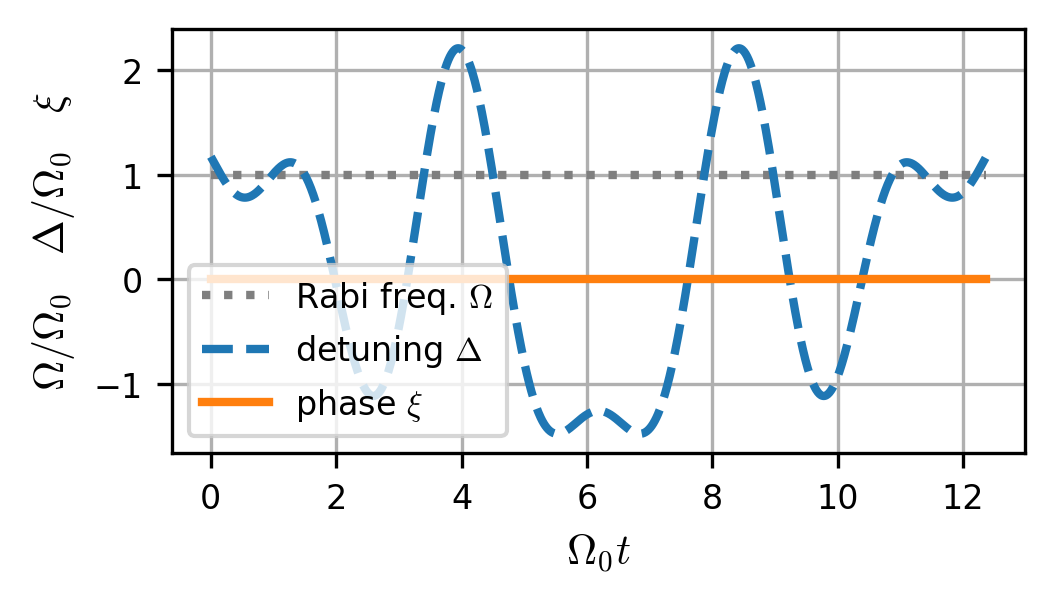

In [1]:
# %pip install -q rydopt[cuda12] # Uncomment for installing RydOpt on Google Colab

import os

os.environ["JAX_PLATFORMS"] = "cuda,cpu"
os.environ["JAX_ENABLE_X64"] = "false"

import numpy as np
import rydopt as ro

# Want a CCCZ gate on two atoms in the perfect blockade regime; no Rydberg state decay
gate = ro.gates.FourQubitGatePyramidal(
    phi=None,
    theta=np.pi,
    theta_prime=np.pi,
    lamb=np.pi,
    lamb_prime=np.pi,
    kappa=np.pi,
    Vnn=float("inf"),
    Vnnn=float("inf"),
    decay=0.0,
)

# Pulse ansatz: constant detuning, sweep of the laser phase according to sin_crab ansatz
pulse_ansatz = ro.pulses.PulseAnsatz(detuning_ansatz=ro.pulses.const_cos_crab)

# Initial pulse parameter guess:
# duration, detuning parameters, phase parameters, Rabi parameters
min_initial_params = (
    11.0,
    [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0],
    [],
    [],
)
max_initial_params = (
    13.0,
    [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
    [],
    [],
)

# Optimize the pulse parameters
opt_result = ro.optimization.multi_start_optimize(
    gate,
    pulse_ansatz,
    min_initial_params,
    max_initial_params,
    num_steps=1000,
    tol=1e-5,
    num_initializations=10000,
    min_converged_initializations=50,
)
optimized_params = opt_result.params

# Plot the pulse
ro.characterization.plot_pulse(pulse_ansatz, optimized_params)